第二章 一意性と不確定性
==

#### 定義2.2（スパーク）
行列$\mathbf{A}$の列が線形従属となる最小の列数を，$\mathbf{A}$のスパーク（spark）と言う．

定義より，行列の零空間中のベクトル$\mathbf{x}$（つまり$\mathbf{Ax}=\mathbf{0}$）は，$\|x\|_{0}\geq \rm{spark}(\mathbf{A})$を満たさなければならない．なぜなら，$\mathbf{A}$から取った列の線形結合がゼロベクトルとなるには，定義から少なくとも$\rm{spark}(\mathbf{A})$個の列が必要だからである．

In [1]:
N, L = 50, 100
Iter = 10000
dd1, dd2 = 0.9, 0.9
# 初期化
D = np.random.randn(N, L)
# 列の正規化
D = np.dot(D, np.diag(np.diag(1./np.sqrt(np.dot(D.T, D)))))
# グラム行列
G = np.dot(D.T, D)
# とりうる相互コヒーレンスの最小値
mu = np.sqrt(float(L - N) / N / (L - 1))
log = []
for k in xrange(Iter):
    # 大きい内積を縮小
    gg = np.sort(np.abs(G.flatten()))
    th = gg[np.round(dd1 * (L * L - L)).astype(np.int)]
    pos = (th < np.abs(G)) * (np.abs(G) < 0.999) 
    G[pos] *= dd2
    # ランクをNに減らす
    U, S, V = np.linalg.svd(G)
    S[N:] = 0
    S = np.diag(S)
    G = np.dot(U, np.dot(S, V))
    # 列を正規化
    n = np.diag(1. / np.sqrt(np.diag(G)))
    G = np.dot(n, np.dot(G, n))
    # 統計量を表示
    gg = np.sort(np.abs(G.flatten()))
    th = gg[np.round(dd1 * (L * L - L)).astype(np.int)]
    pos = (th < np.abs(G)) * (np.abs(G) < 0.999)
    print k, mu, np.mean(np.abs(G[pos])), max(np.abs(G[pos]))
    log.append([k, mu, np.mean(np.abs(G[pos])), max(np.abs(G[pos]))])
U, S, V = np.linalg.svd(G)
S = np.diag(S)
D_Grassmannian = np.dot(np.sqrt(S[:N, :N]), U[:N, :])

0 0.100503781526 0.272461761011 0.514051639295
1 0.100503781526 0.259194131884 0.491695298691
2 0.100503781526 0.247331352621 0.46568075321
3 0.100503781526 0.236632633996 0.442293093984
4 0.100503781526 0.22728454604 0.415405555935
5 0.100503781526 0.219394459038 0.388615417058
6 0.100503781526 0.212382398497 0.36600689359
7 0.100503781526 0.2064438434 0.341232774586
8 0.100503781526 0.201335347753 0.319210148446
9 0.100503781526 0.197027627854 0.298810921726
10 0.100503781526 0.193144768322 0.280681556276
11 0.100503781526 0.189843979576 0.261370573581
12 0.100503781526 0.186966394061 0.24761791754
13 0.100503781526 0.184253094403 0.23173134522
14 0.100503781526 0.181748370766 0.218171798724
15 0.100503781526 0.179550494456 0.203796068753
16 0.100503781526 0.177536580889 0.194853253651
17 0.100503781526 0.175475828791 0.191250214082
18 0.100503781526 0.173894583497 0.184299386272
19 0.100503781526 0.172249616295 0.180234315708
20 0.100503781526 0.170669569662 0.177767315373
21 0.1005

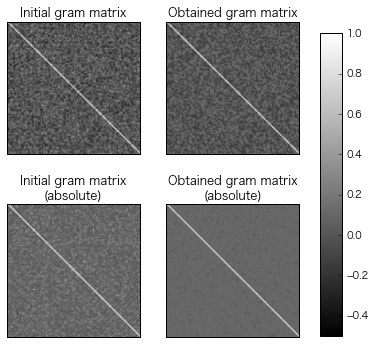

In [2]:
G2 = np.dot(D.T, D)
titles = ['Initial gram matrix', 'Obtained gram matrix', 
          'Initial gram matrix\n(absolute)', 'Obtained gram matrix\n(absolute)']

fig, ax = plt.subplots(2, 2, figsize=(6, 6))
plt.gray()
ax = ax.flatten()
for i, mat in enumerate([G2, G, np.abs(G2), np.abs(G)]):
    im = ax[i].imshow(mat, vmin=-0.5, vmax=1)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(titles[i])
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.savefig('Grassmannian.png', dpi=220)

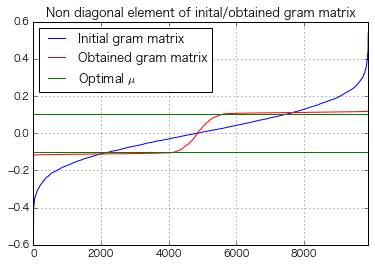

In [3]:
gg = np.sort(G.flatten()).flatten()
gg2 = np.sort(G2.flatten()).flatten()

plt.title('Non diagonal element of inital/obtained gram matrix')
plt.plot(gg2[:-100], label='Initial gram matrix', color='blue')
plt.plot(gg[:-100], label='Obtained gram matrix', color='red')
plt.plot([mu] * 9900, label='Optimal $\mu$', color='green')
plt.axhline(-mu, 0, 9900, color='green')
plt.xlim(0, 9900)
plt.grid()
plt.legend(loc='upper left')
plt.savefig('NonDiagonalElement.png', dpi=220)

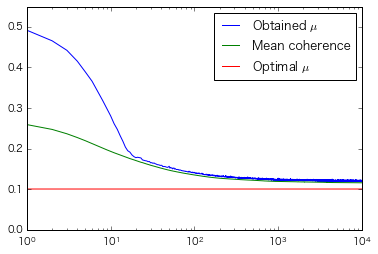

In [8]:
log = np.array(log)
plt.semilogx(log[:, 3], label='Obtained $\mu$')
plt.semilogx(log[:, 2], label='Mean coherence')
plt.semilogx(log[:, 1], label='Optimal $\mu$')
plt.legend(loc='upper right')
plt.ylim(0, 0.55)
plt.savefig('CoherenceIteration.png', dpi=220)